In [1]:
from netCDF4 import Dataset, num2date
import numpy as np
import pandas as pd
import xarray as xr
import os
import time
import matplotlib.pyplot as plt
import matplotlib
import gc
from matplotlib import transforms
import matplotlib.colors as clrs
import glob

In [2]:
filein = ("/gpfs/fs7/dfo/hpcmc/comda/stod000/DATA/CAFE/PP_3oceans.nc")
data = Dataset(filein, "r", format="NETCDF4")
print(data)

obsPP = data.variables['npp'][:]
obsPP = obsPP/12

[nt,ny,nx]=np.shape(obsPP)
#obsPP=np.zeros((nt,ny,nx))
#obsPP[:,:,:]=obsPP
    
print(np.shape(obsPP), np.nanmin(obsPP), np.nanmax(obsPP))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    CDI: Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    history: Fri Dec 08 18:02:21 2023: cdo remapdis,/home/christianj/GPSC_3OM/op/CREG025_LIM3-VFD003_5d_grid_T_19931001-19931005.nc cafe_global_1degree_clim.nc PP_3oceans.nc
    CDO: Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/cdo)
    dimensions(sizes): time(12), x(528), y(735)
    variables(dimensions): float64 time(time), float32 nav_lon(y, x), float32 nav_lat(y, x), float32 npp(time, y, x)
    groups: 
(12, 735, 528) 2.8583019 108.060265


/tmp/ipykernel_153740/3426665531.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obsPP = data.variables['npp'][:]


In [3]:
data_file = Dataset("/gpfs/fs7/dfo/hpcmc/comda/stod000/CREG25/regions_mask_6.nc", "r", format="NETCDF4")
regindx = (data_file['regions_mask'][:])
print(regindx.shape)

data_file = Dataset("/home/fid000/WORK7/ANALYSIS/DATA/CREG025_mesh_mask.nc", "r", format="NETCDF4")
tmask = (data_file['tmask'][0,:,:,:])
print(tmask.shape)

print(np.nanmin(regindx),np.nanmean(regindx),np.nanmax(regindx))
print(np.min(tmask),np.mean(tmask),np.max(tmask))

tmask0=tmask[0,:,:].squeeze()

nxy=np.size(regindx)
I = np.reshape(regindx, (nxy,))
nreg=int(max(I))
mask = regindx
mask = mask.flatten()

/tmp/ipykernel_153740/2096643997.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  regindx = (data_file['regions_mask'][:])


(735, 528)
(75, 735, 528)
0.0 2.0095472683383417 9.0
0 0.3011297327011613 1


/tmp/ipykernel_153740/2096643997.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tmask = (data_file['tmask'][0,:,:,:])


/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

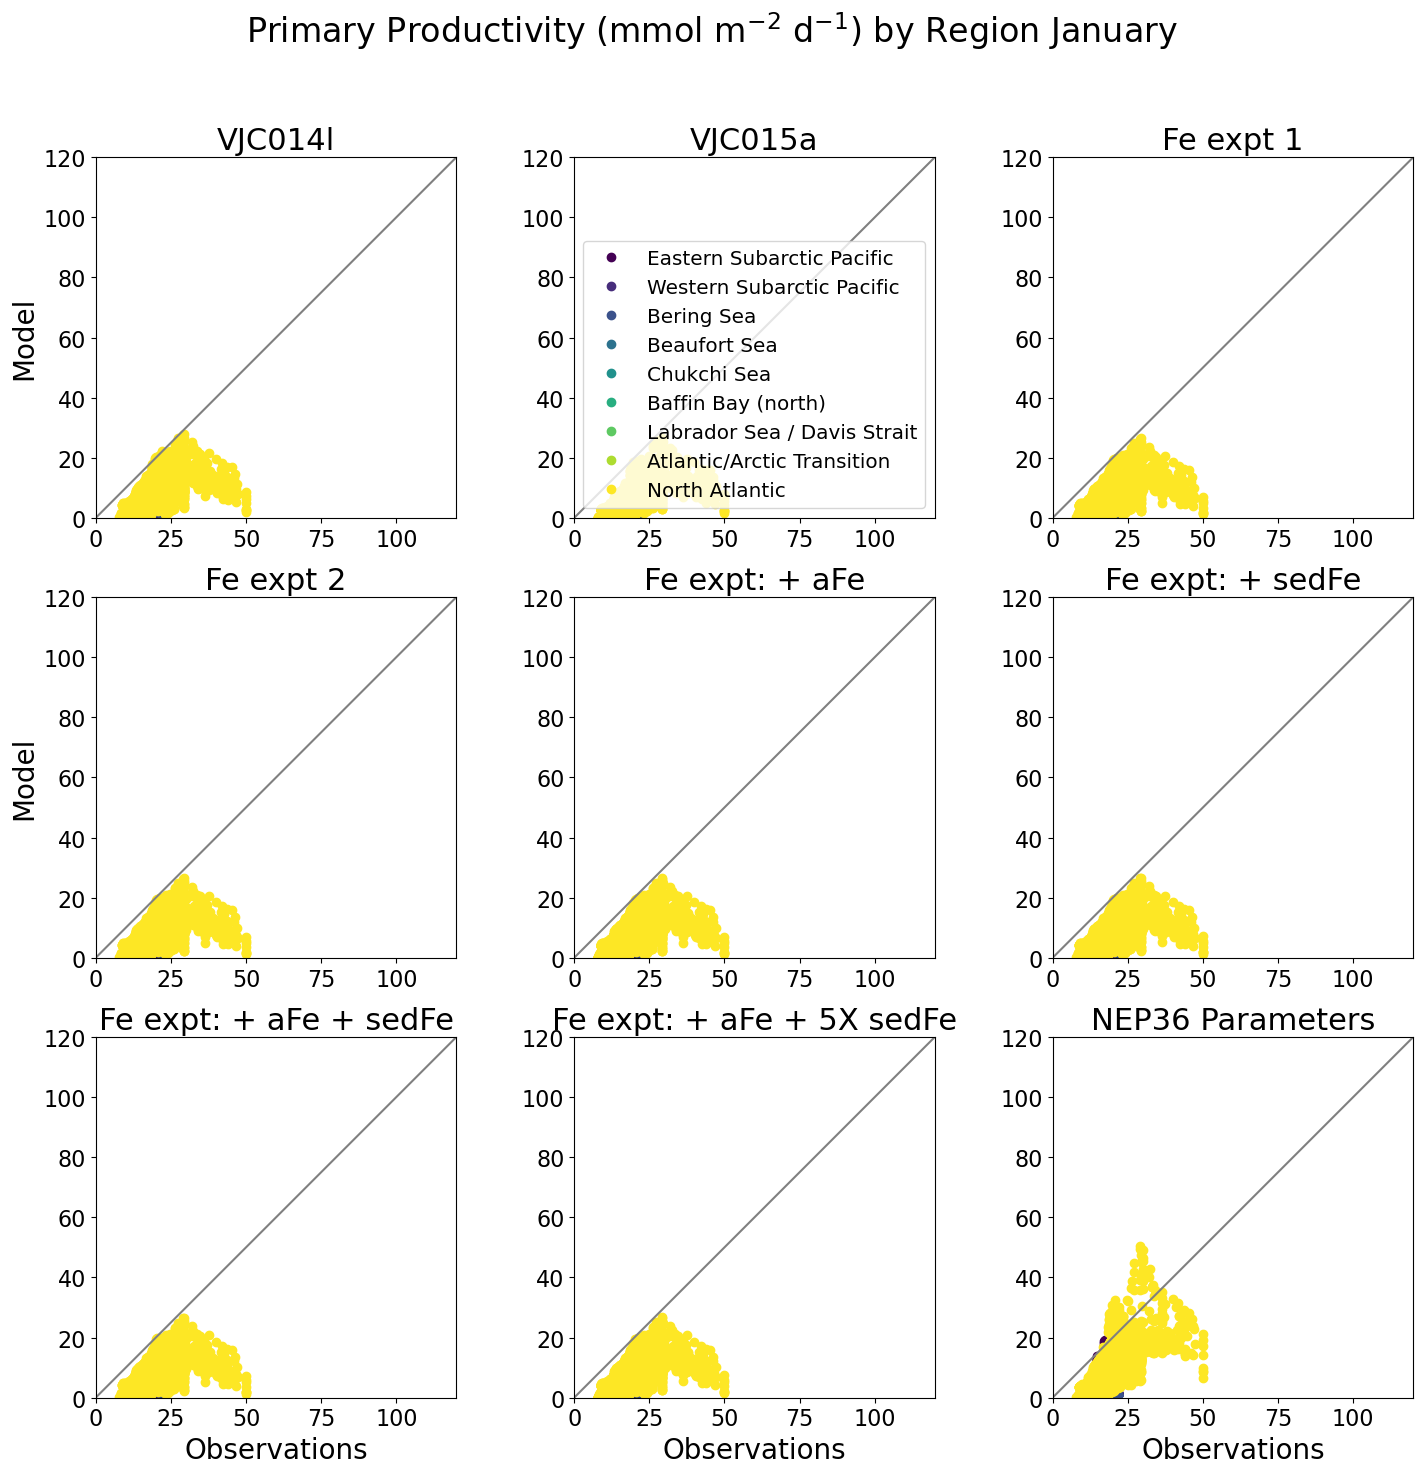

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

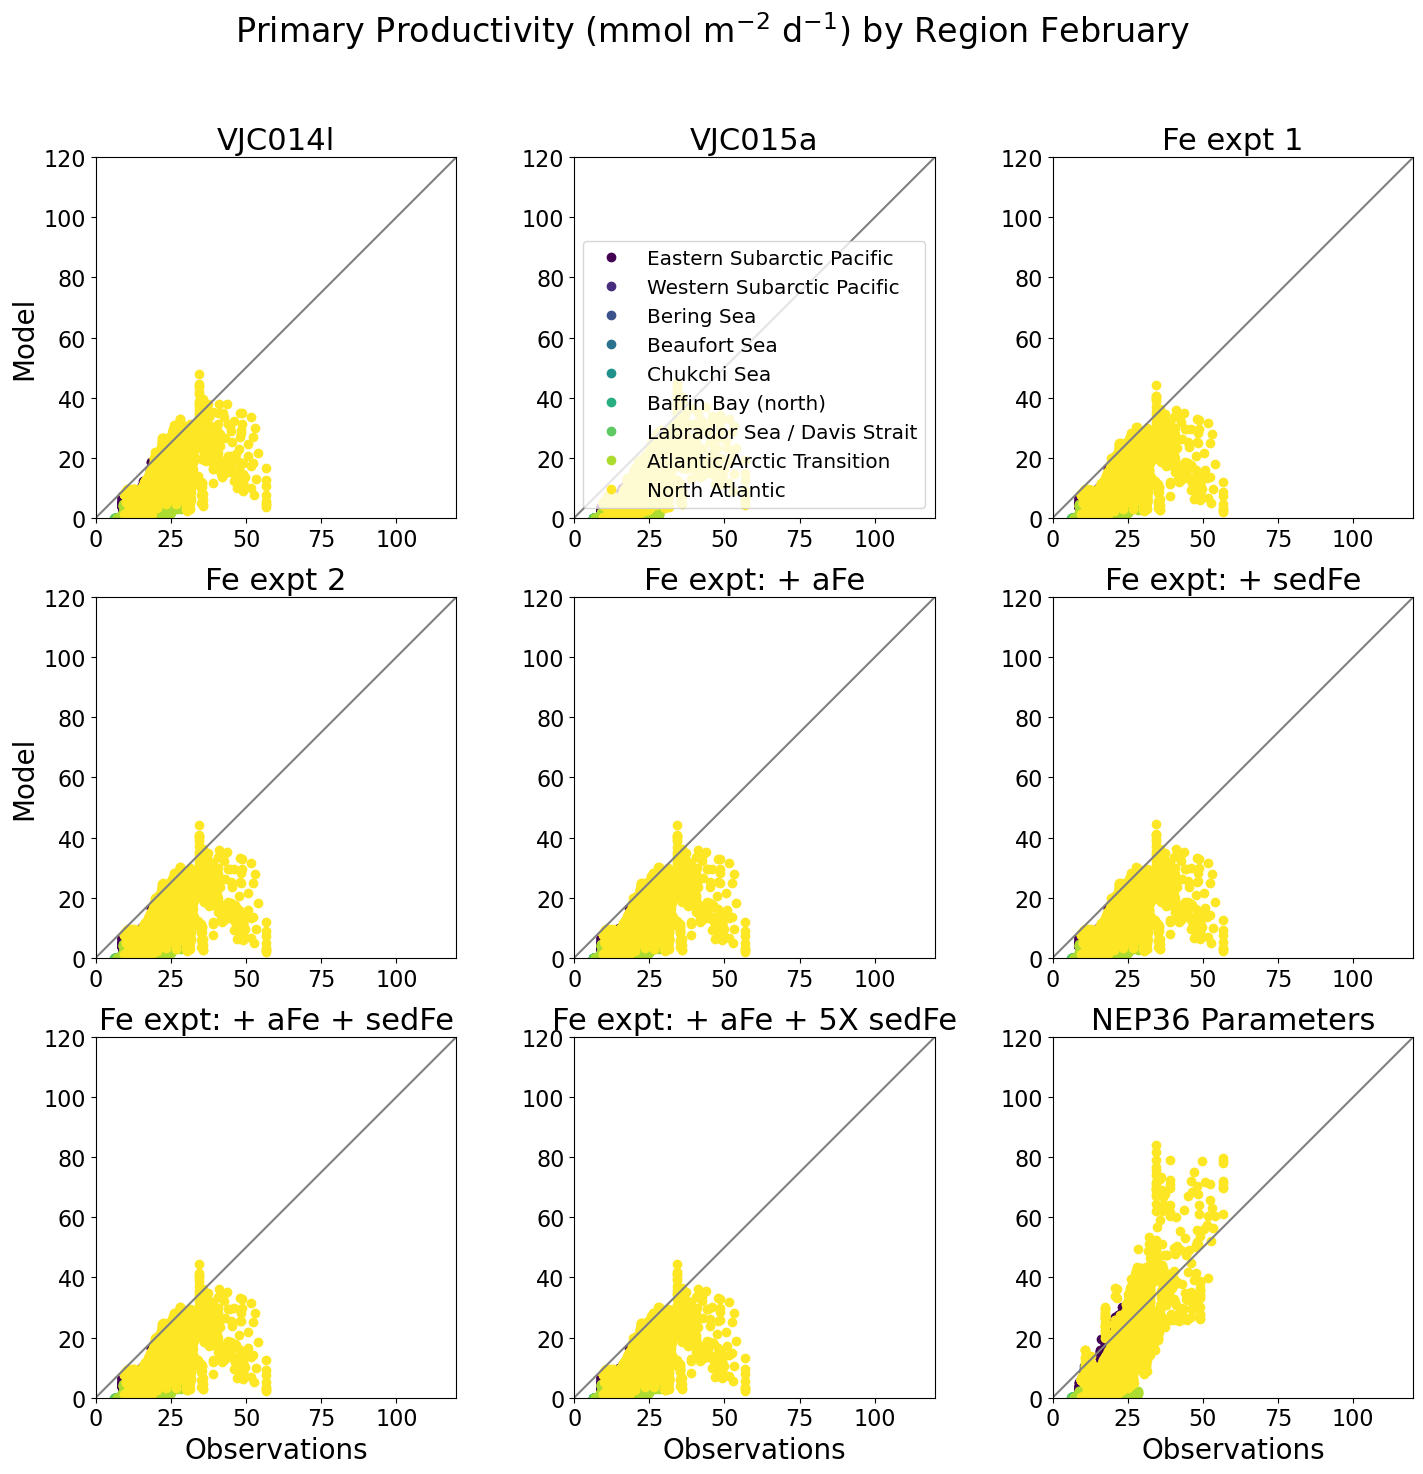

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

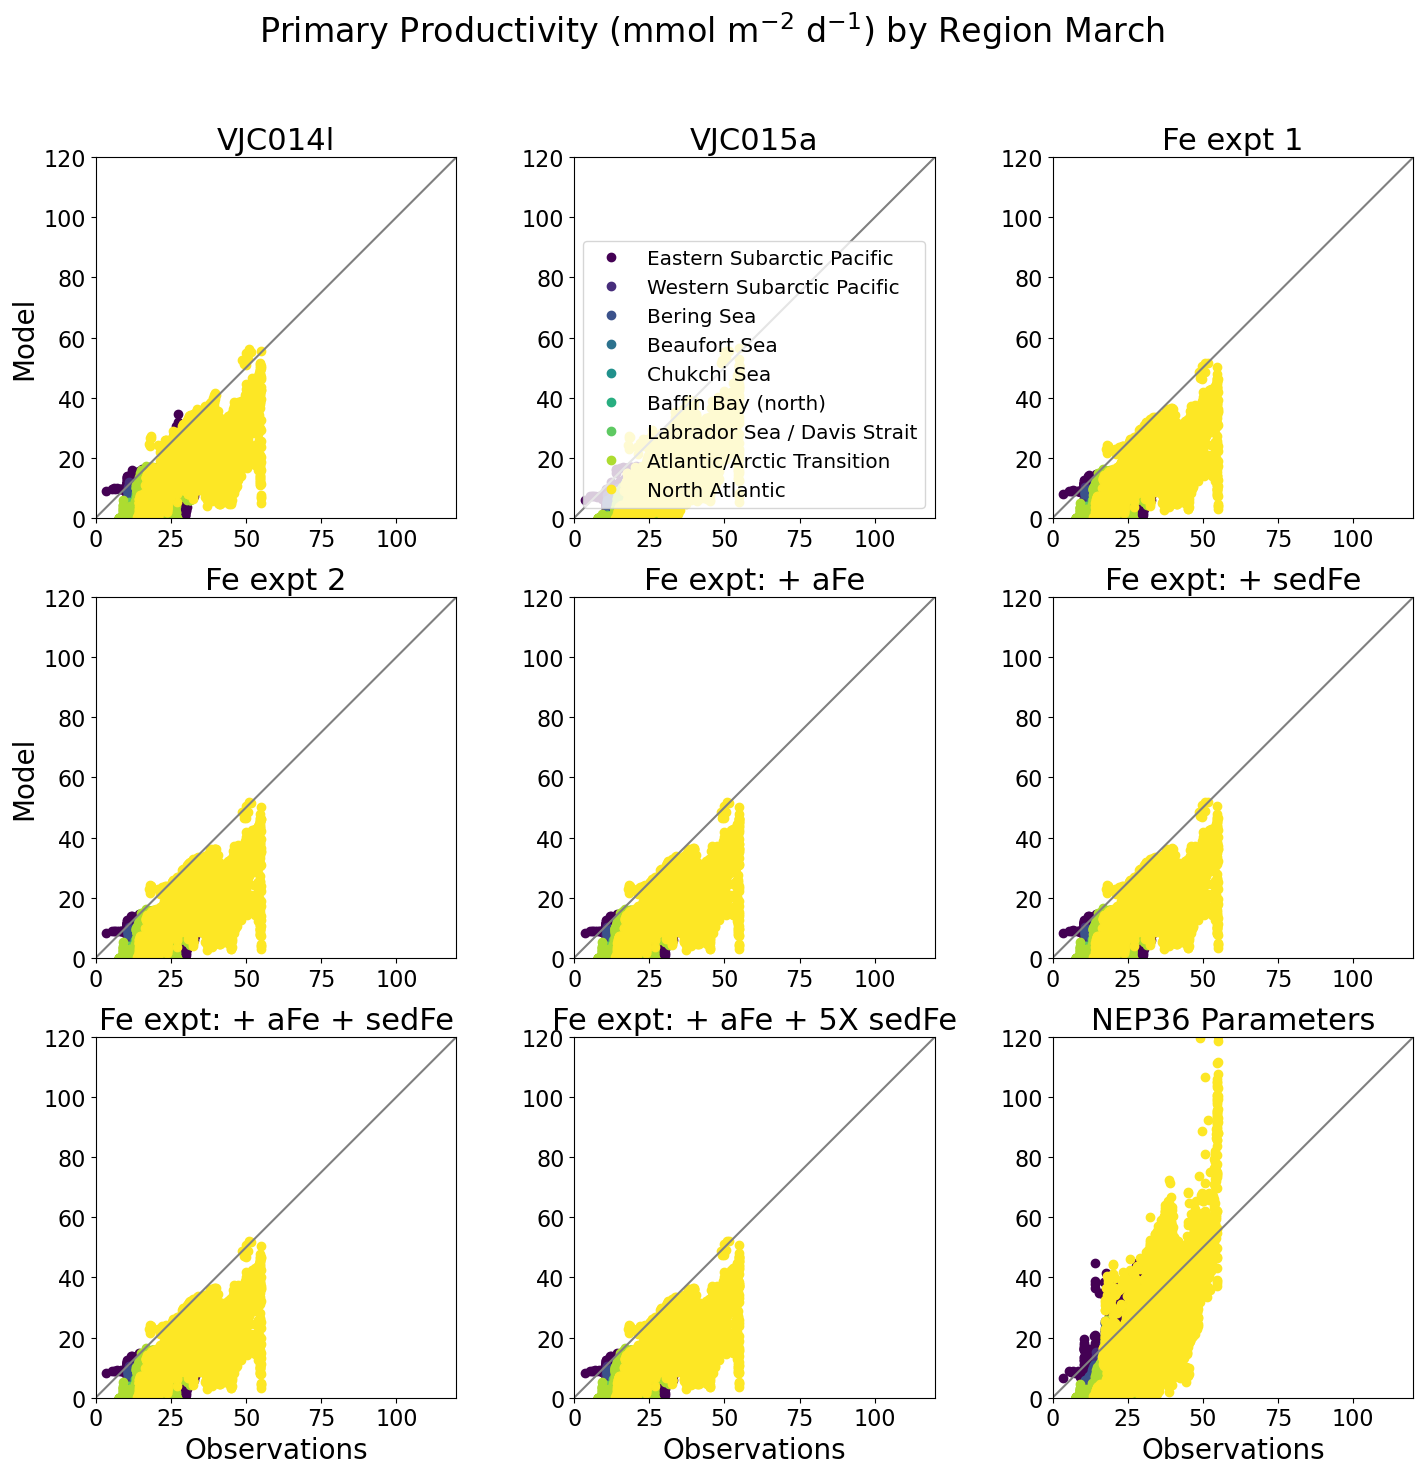

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

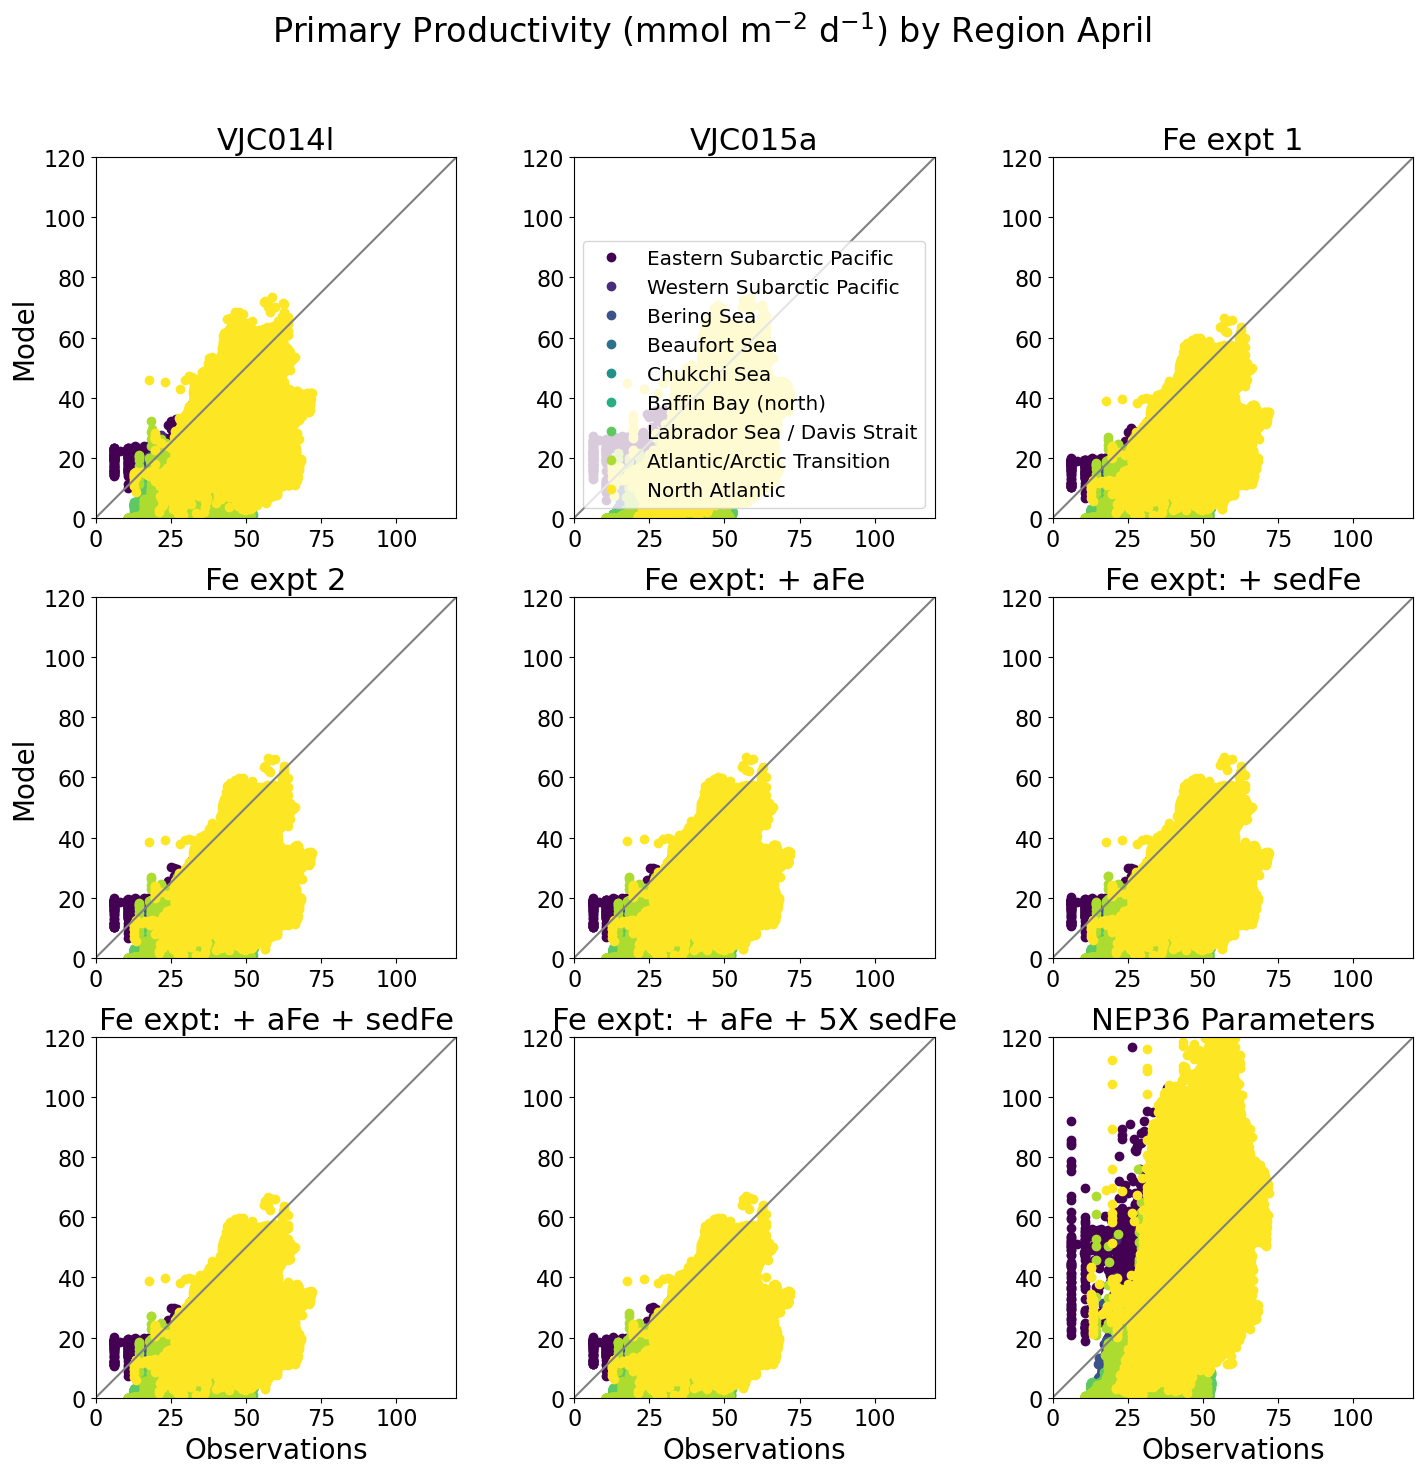

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

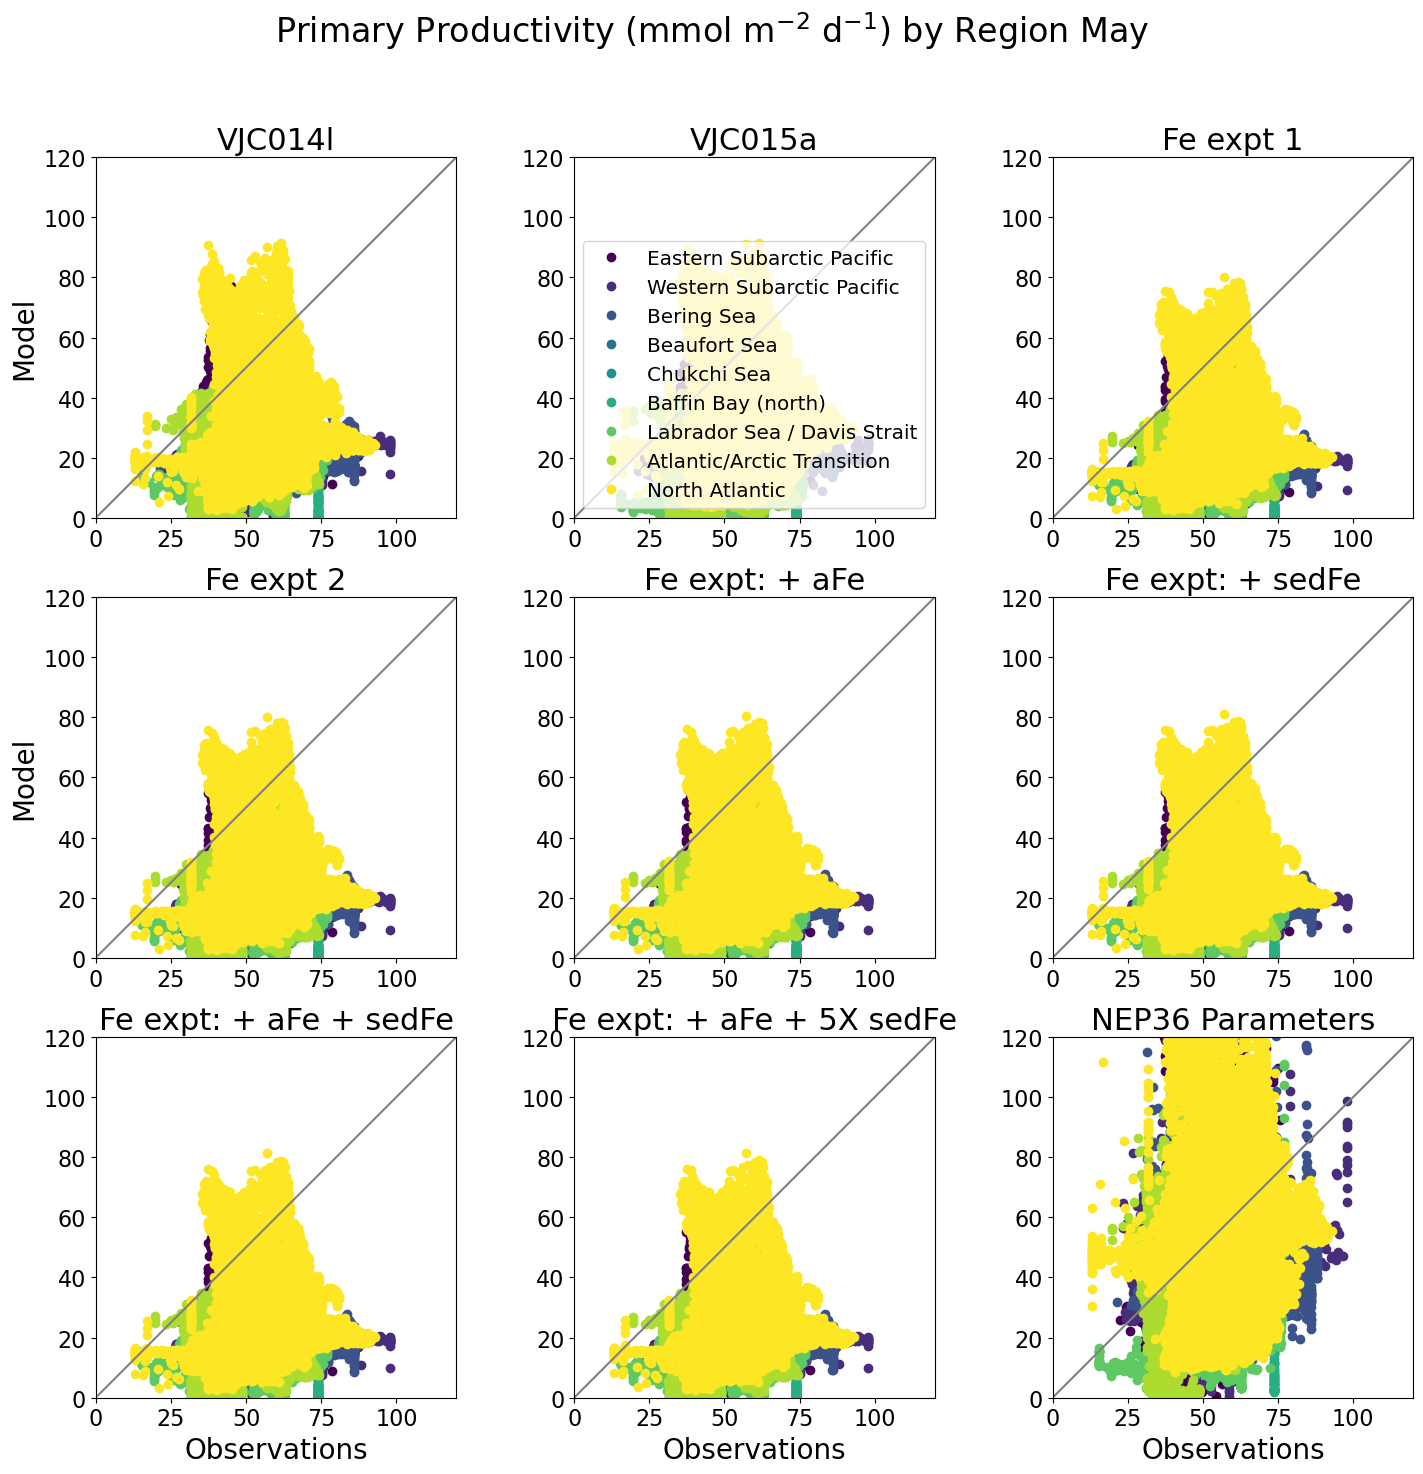

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]


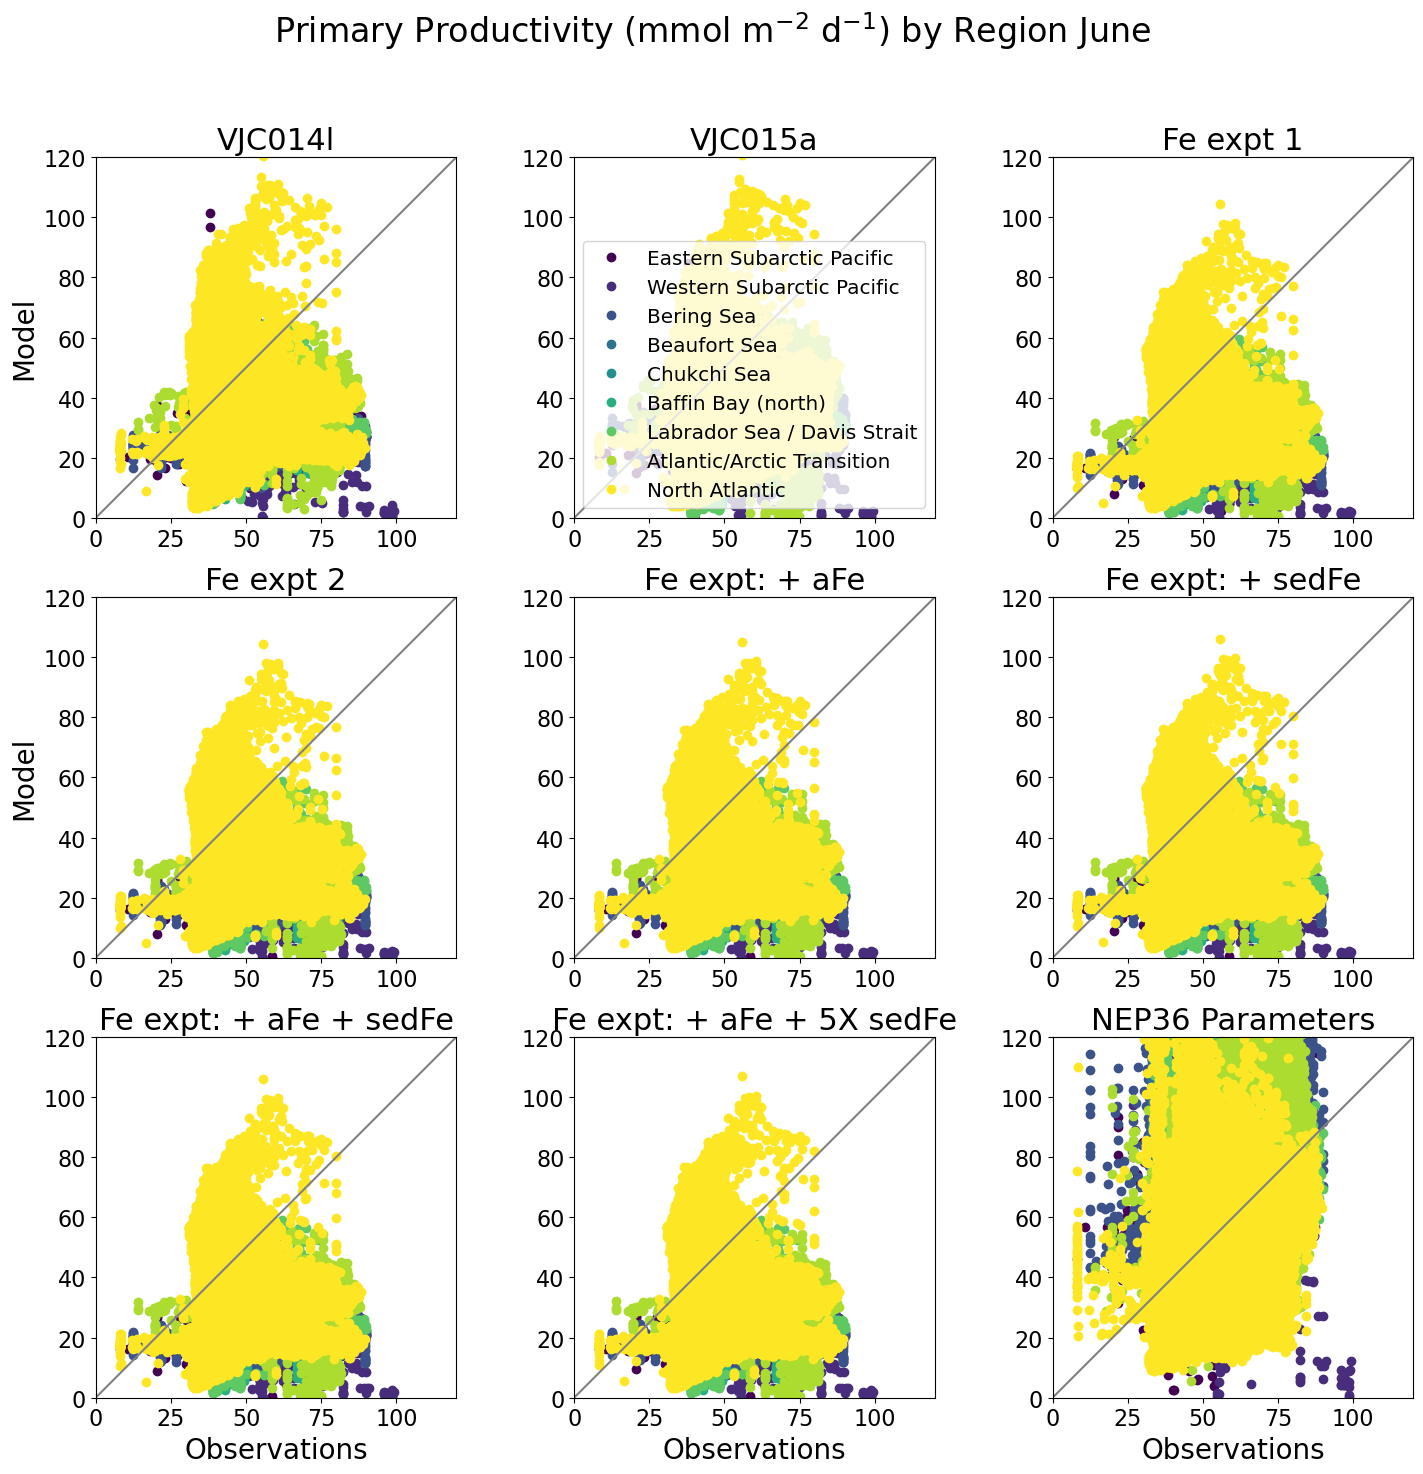

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]


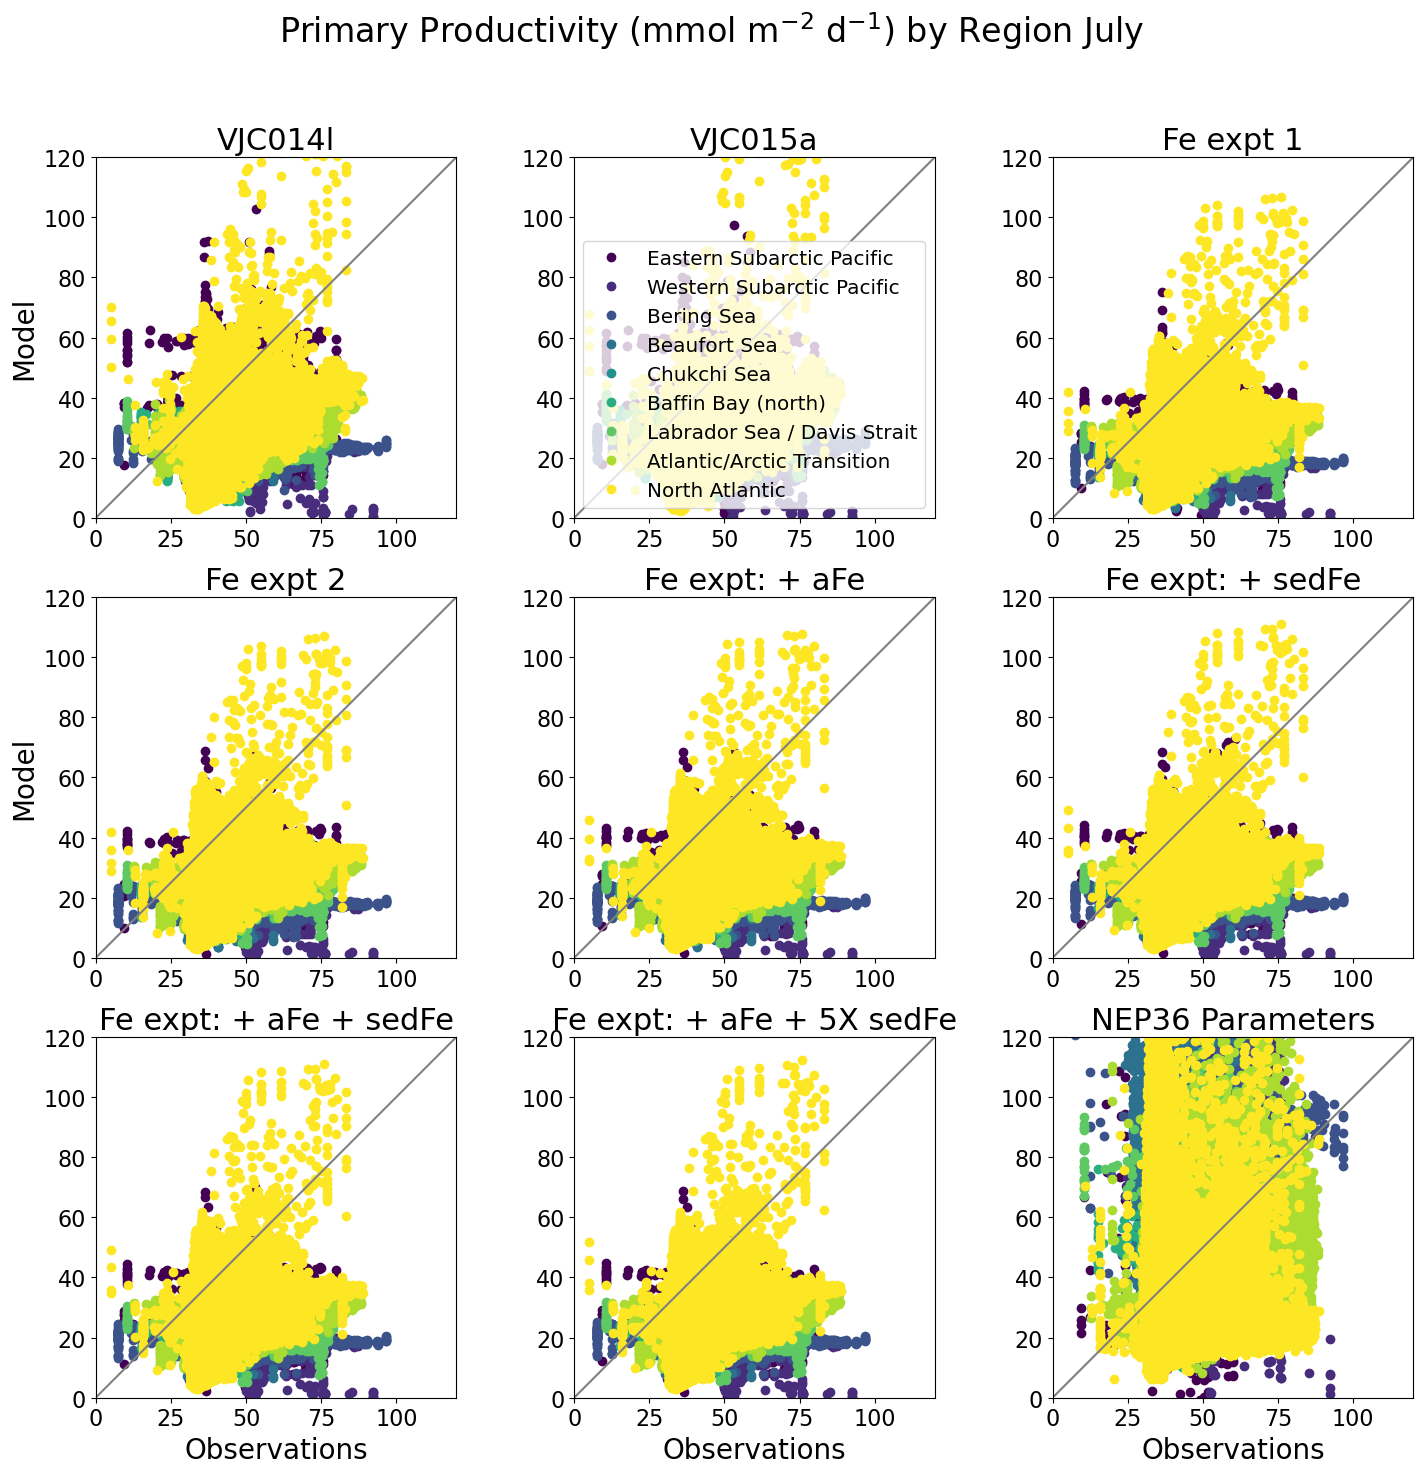

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]


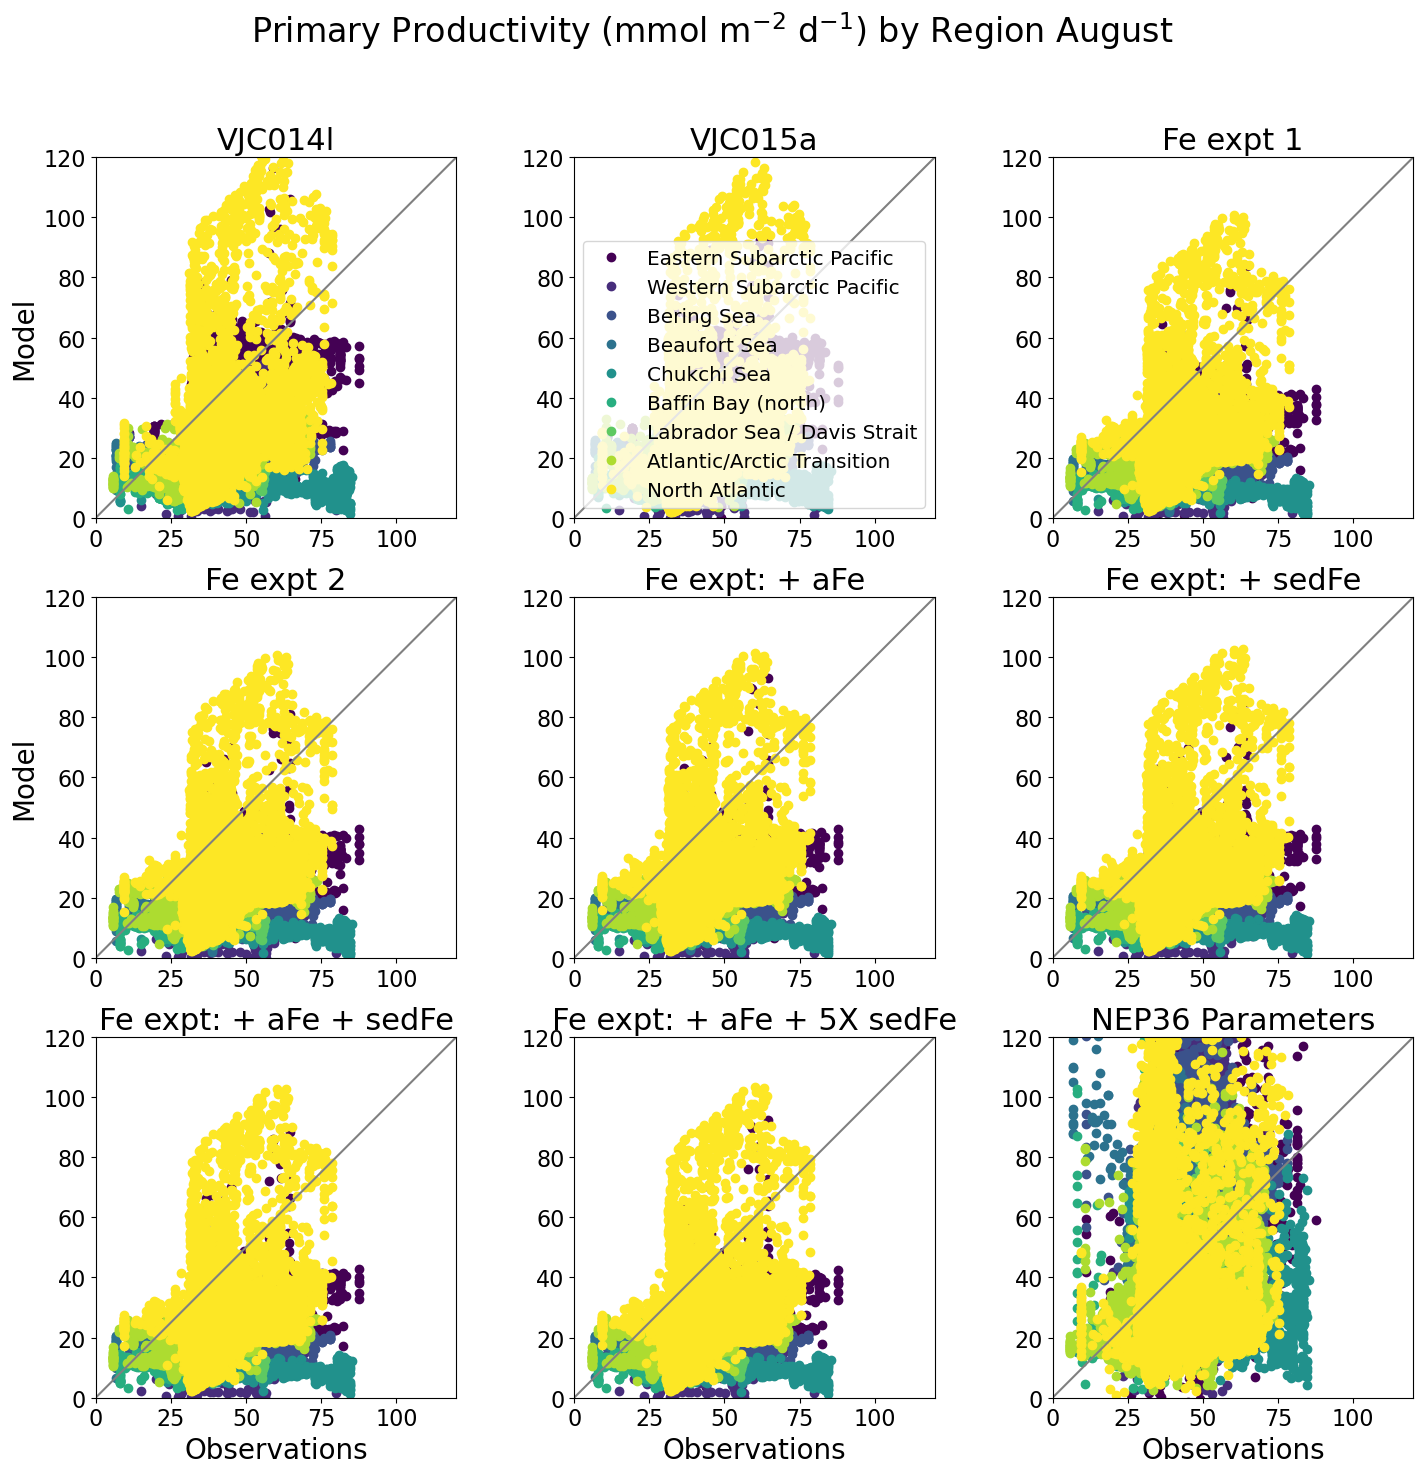

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

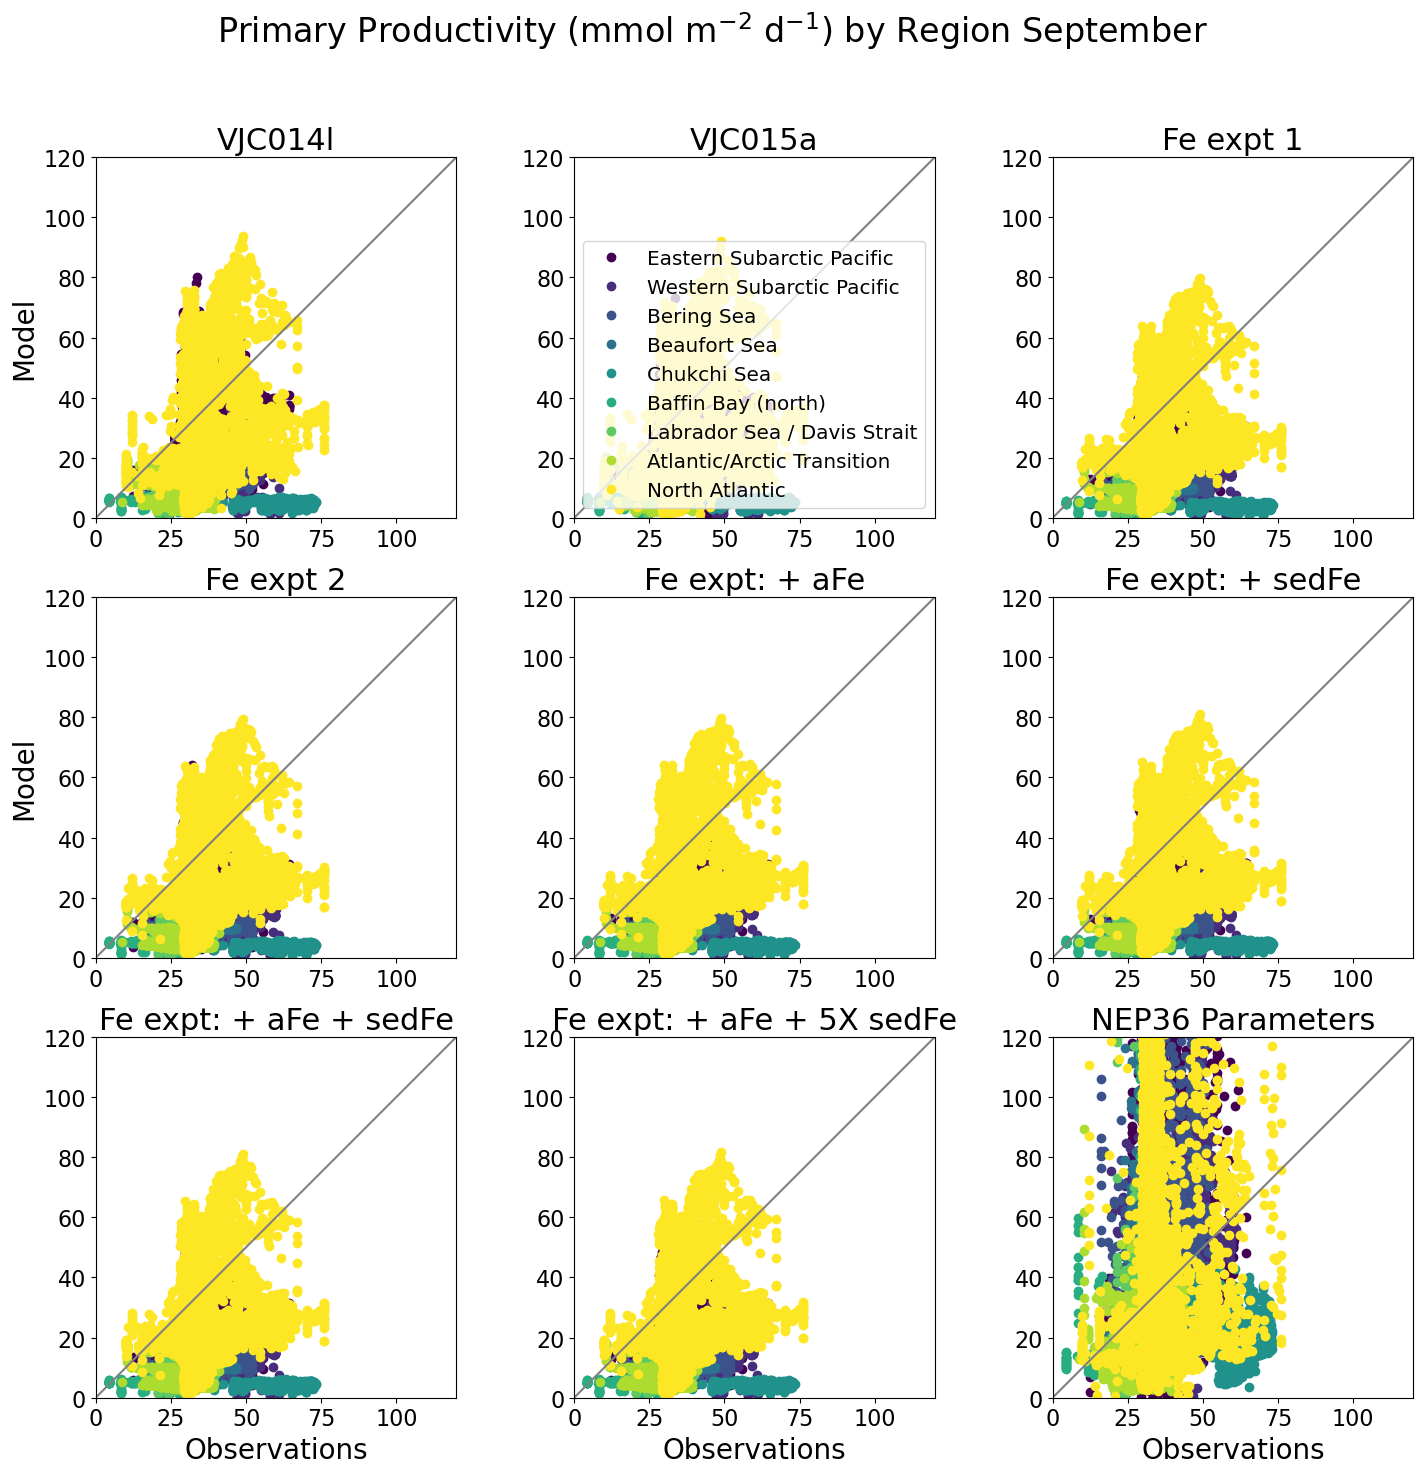

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]


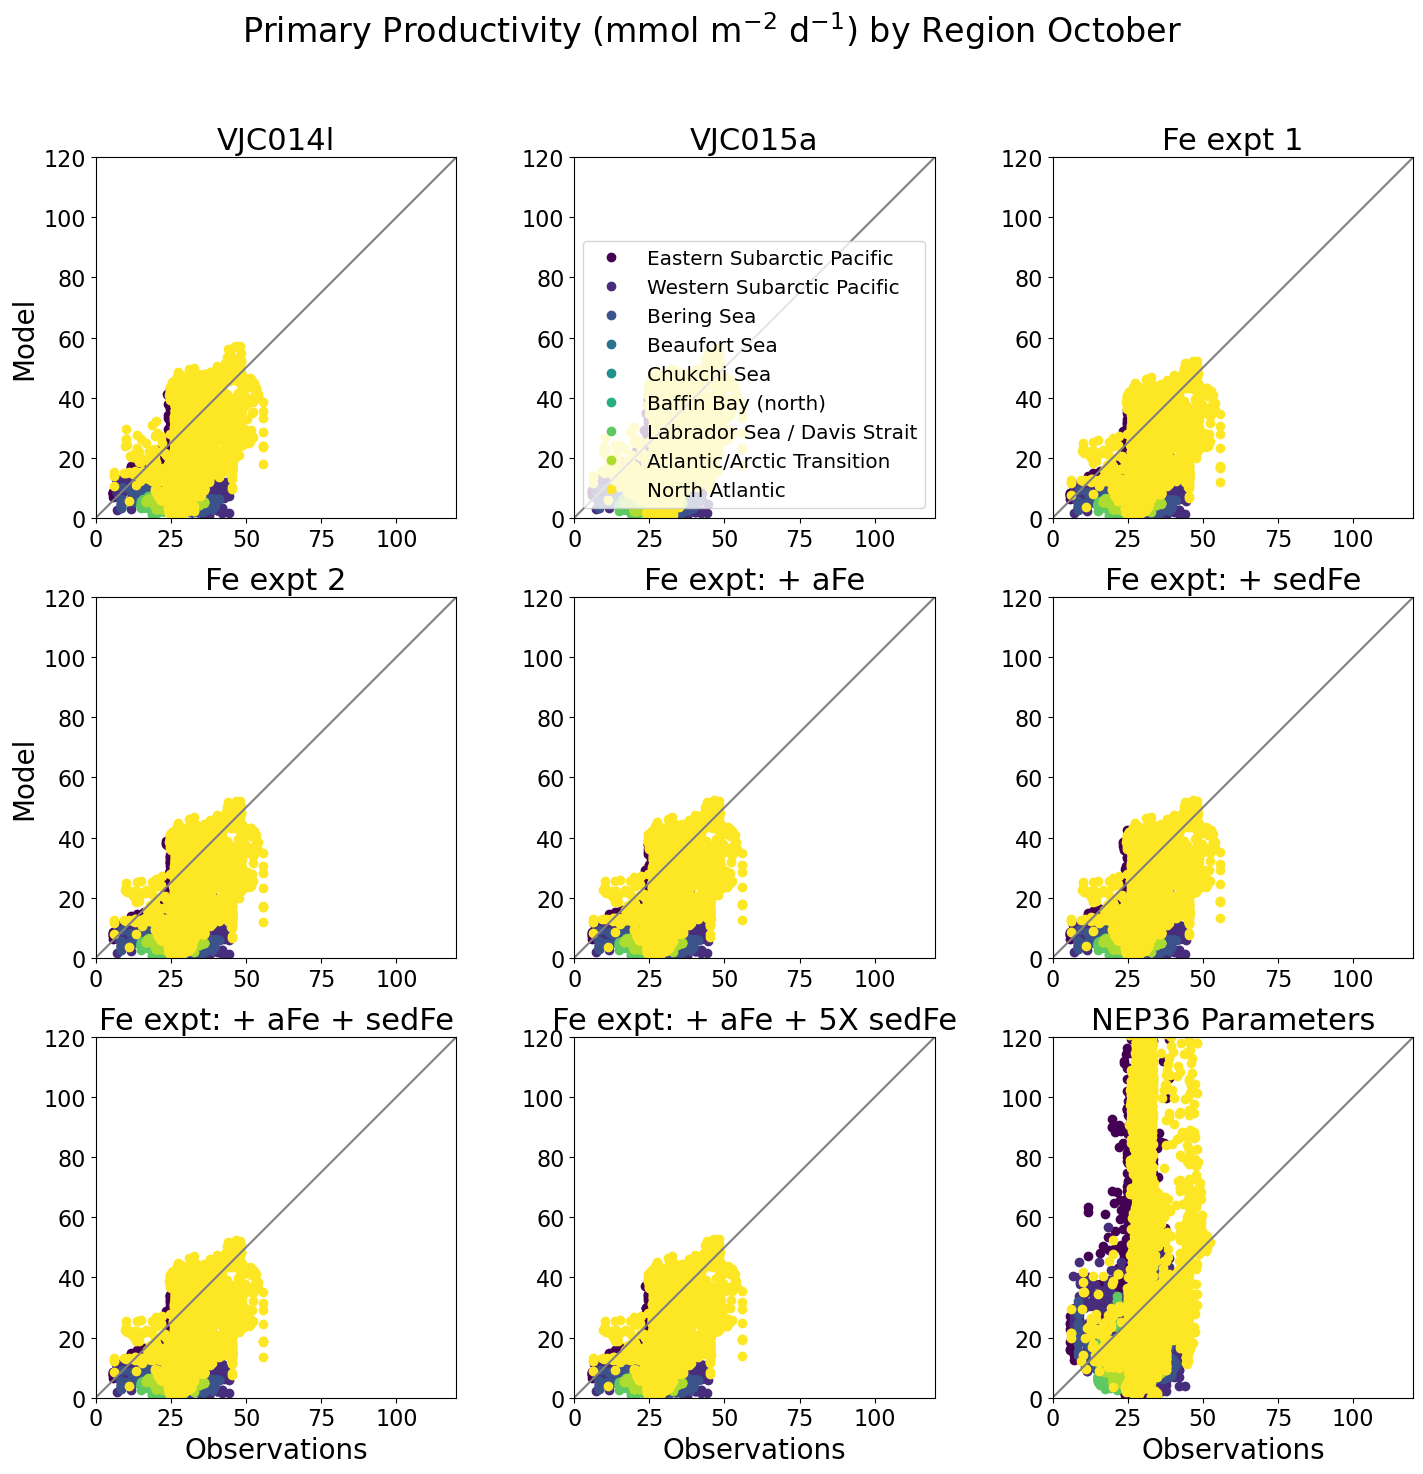

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]


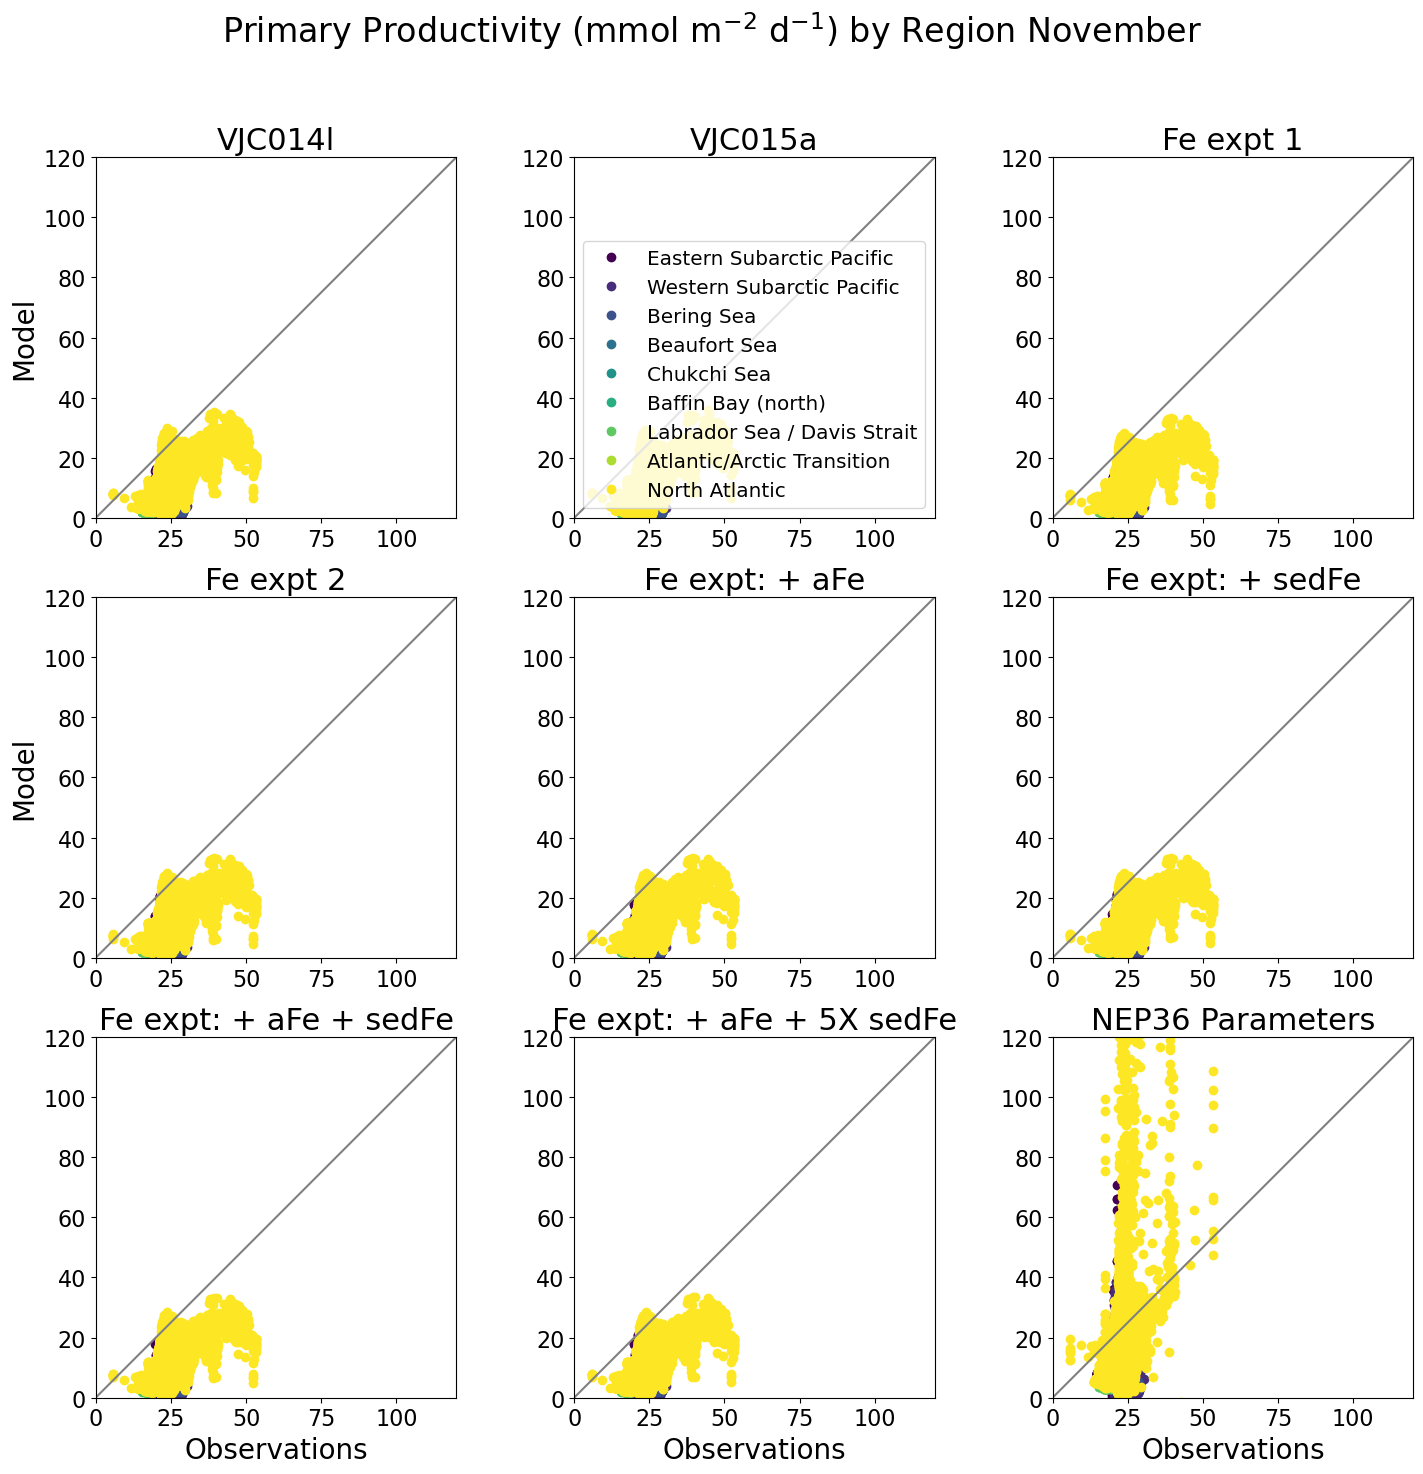

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]
/tmp/ipykernel_153740/2227903520.py:35: DeprecationW

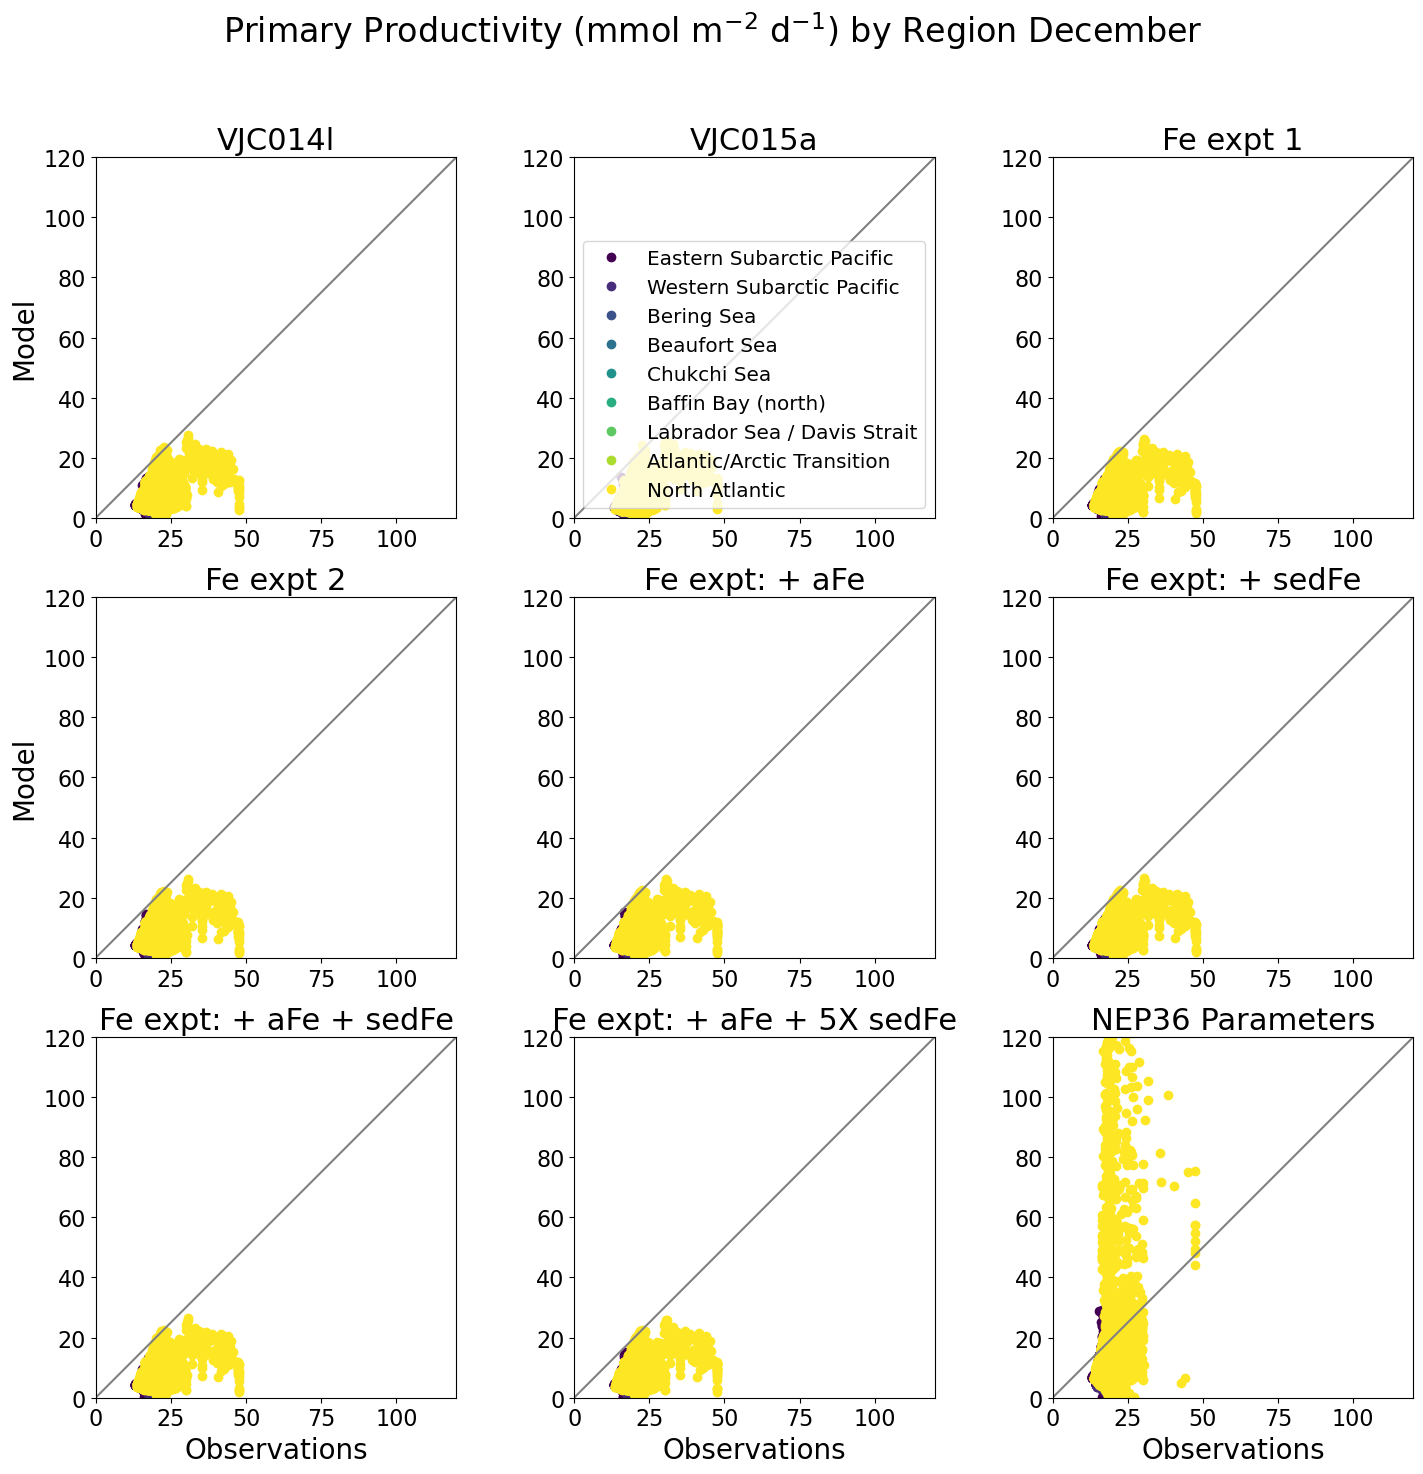

In [5]:
# Presentation quality plot for BioMod Workshop

import itertools
iz = np.arange(10)

months=['January','February','March','April','May','June','July','August','September','October','November','December']
regions = ['Eastern Subarctic Pacific', 'Western Subarctic Pacific', 'Bering Sea', 'Beaufort Sea', 'Chukchi Sea', 'Baffin Bay (north)', 'Labrador Sea / Davis Strait', 'Atlantic/Arctic Transition', 'North Atlantic']
variants = ['-VJC014l','-VJC015a','-VJC015oi','-VJC015ol','-VJC015on','-VJC015or','-VJC015os','-VJC015ot','-VJCnep01']
variantdict = ['VJC014l','VJC015a','Fe expt 1','Fe expt 2','Fe expt: + aFe','Fe expt: + sedFe','Fe expt: + aFe + sedFe',
               'Fe expt: + aFe + 5X sedFe','NEP36 Parameters']

for im, mmon in enumerate(months):
    
    fig, axes = plt.subplots(num=1, clear=True, nrows=3, ncols=3, figsize=(15, 15))
    #fig.suptitle('Mean Primary Productivity (mmol m$^{-2}$ d$^{-1}$) by Region '+mmon, fontsize=24) 
    fig.suptitle('Primary Productivity (mmol m$^{-2}$ d$^{-1}$) by Region '+mmon, fontsize=24) 

    for a, asuff in enumerate(variants):
        cx=plt.subplot(3,3, a+1)
        runid = str('CREG025_LIM3_CANOE'+asuff)
        #print(runid)
        data_all=np.zeros((12,ny,nx))
        flist = glob.glob("/gpfs/fs7/dfo/hpcmc/comda/stod000/CREG25/processed_op/PP/"+runid+"_monthly_PP.nc")
        flist.sort()
        #print(flist)
        ifile = 0
        colors =itertools.cycle(plt.get_cmap('viridis')(np.linspace(0,1, 9))) # potential pallettes: hsv, jet, gnuplot

        for i, c in enumerate(regions): 
            
            if i >= 0:
                
                filein = flist[ifile]
                data = Dataset(filein, "r", format="NETCDF4")
                modPP = data.variables['PPPHY'][:]+data.variables['PPPHY2'][:]

                tmaskz=tmask[iz,:,:].flatten()
                ZZ=(np.zeros((10,ny,nx))+regindx).flatten()    # broadcast regions map into a 3D array with same data for each depth
                XOBS=obsPP[im,:,:].squeeze().flatten()
                XMOD=modPP[im,:,:].squeeze().flatten()
                ii=np.where( ~np.isnan(XOBS) )[0]
                XOBS=XOBS[ii]; XMOD=XMOD[ii]; ZZ=ZZ[ii]; tmaskz=tmaskz[ii];
                jj=np.where( (XOBS>0.) & (ZZ==(i+1)) & (tmaskz==1) )[0]
                #XOBS=np.mean(XOBS[jj]); XMOD=np.mean(XMOD[jj])
                
                colour = next(colors) 
                plt.plot(XOBS[jj], XMOD[jj], "o", color=colour, markeredgecolor=colour, label=regions)

                #plt.plot(XOBS, XMOD, "o", color=colour, markeredgecolor=colour, markersize=15, label=regions)
            
            plt.ylim([0,120]); plt.xlim([0,120])
            cx.tick_params(axis='both', labelsize=16)
            cx.set_aspect(1./cx.get_data_ratio())
            #plt.xticks([200,400,600,800,1000]);plt.yticks([200,400,600,800,1000])
            plt.title(variantdict[a], fontsize=22)

            if a ==1:
                plt.legend(labels=['Eastern Subarctic Pacific', 'Western Subarctic Pacific', 'Bering Sea', 'Beaufort Sea', 'Chukchi Sea', 'Baffin Bay (north)', 'Labrador Sea / Davis Strait', 'Atlantic/Arctic Transition', 'North Atlantic'],
                           fontsize='x-large', loc = 'lower right')
                
            if (a == 0) or (a == 3):
                plt.ylabel("Model", fontsize=20)

            if (a == 6) or (a == 7) or (a == 8):
                plt.xlabel("Observations", fontsize=20)

        cx.plot([0, 1], [0, 1], color='grey', transform=cx.transAxes)
            
    plt.tight_layout(rect=(0,0,1,0.95), w_pad=0)
    plt.show()
    #fig.savefig("/home/fid000/WORK7/ANALYSIS/model_evaluation/FIGURES/PresentationFigures/PP_FE/pp_means_month"+str("{:02d}".format(im+1)))
    fig.savefig("/home/fid000/WORK7/ANALYSIS/model_evaluation/FIGURES/PresentationFigures/PP_FE/pp_month"+str("{:02d}".format(im+1)))